## Deep Learning:Are we losing customers?
### Submitted By: Supriya Ramachandra

### Import libraries

In [32]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

### Class with function to load, preprocess and explore dataset

In [33]:
class data_preprocess:
    def __init__(self,file_name=None):
        self.file_name = file_name
    def load_data(self):
        customer_data = pd.read_csv(self.file_name)
        return customer_data
    def Xytable(self,customer_data):
        customer_data = customer_data.drop(['CustomerId','Surname'],axis=1)
        X=customer_data.iloc[:,:-1]
        y=customer_data.iloc[:,-1]
        return X,y
    def categorical_data(self,X):
        label1 = LabelEncoder()
        X['Geography'] = label1.fit_transform(X['Geography'])
        label = LabelEncoder()
        X['Gender'] = label.fit_transform(X['Gender'])
        X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
        return X
    def EDA(self,customer_data):
        print('customer_data shape',customer_data.shape)
        feature = customer_data.dtypes
        unique = customer_data.nunique()
        is_null = customer_data.isnull().sum()
        d_t = list(str(x) for x in feature[0:len(feature)])
        u_val = list(str(x) for x in unique[0:len(unique)])
        n_val =  list(str(x) for x in is_null[0:len(is_null)])
        eda = {'Features': feature.index,
                'data_types': d_t,
                'unique_feature_values' : u_val,
                'is_null' : n_val
                }
        EDA = pd.DataFrame(eda, columns = ['Features', 'data_types','unique_feature_values','is_null'])
        return EDA

### Read and load dataset into pandas dataframe 

In [34]:
file_name = "dataset.csv"
dp = data_preprocess(file_name)
customer_data = dp.load_data()

### Exploratory Data Analysis

In [35]:
eda = dp.EDA(customer_data)
print(eda)

customer_data shape (9000, 13)
           Features data_types unique_feature_values is_null
0        CustomerId      int64                  9000       0
1           Surname     object                  2784       0
2       CreditScore      int64                   459       0
3         Geography     object                     3       0
4            Gender     object                     2       0
5               Age      int64                    70       0
6            Tenure      int64                    11       0
7           Balance    float64                  5758       0
8     NumOfProducts      int64                     4       0
9         HasCrCard      int64                     2       0
10   IsActiveMember      int64                     2       0
11  EstimatedSalary    float64                  8999       0
12           Exited      int64                     2       0


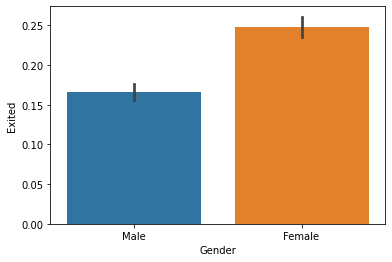

In [36]:
#Distribution of exited customers based on gender
sns.barplot(x='Gender', y='Exited', data=customer_data)

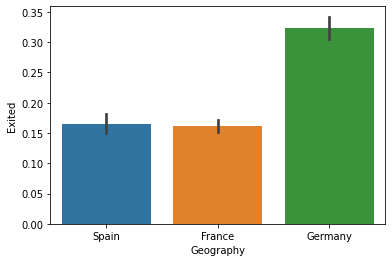

In [37]:
#Distribution of exited customers based on geography
sns.barplot(x='Geography', y='Exited', data=customer_data)

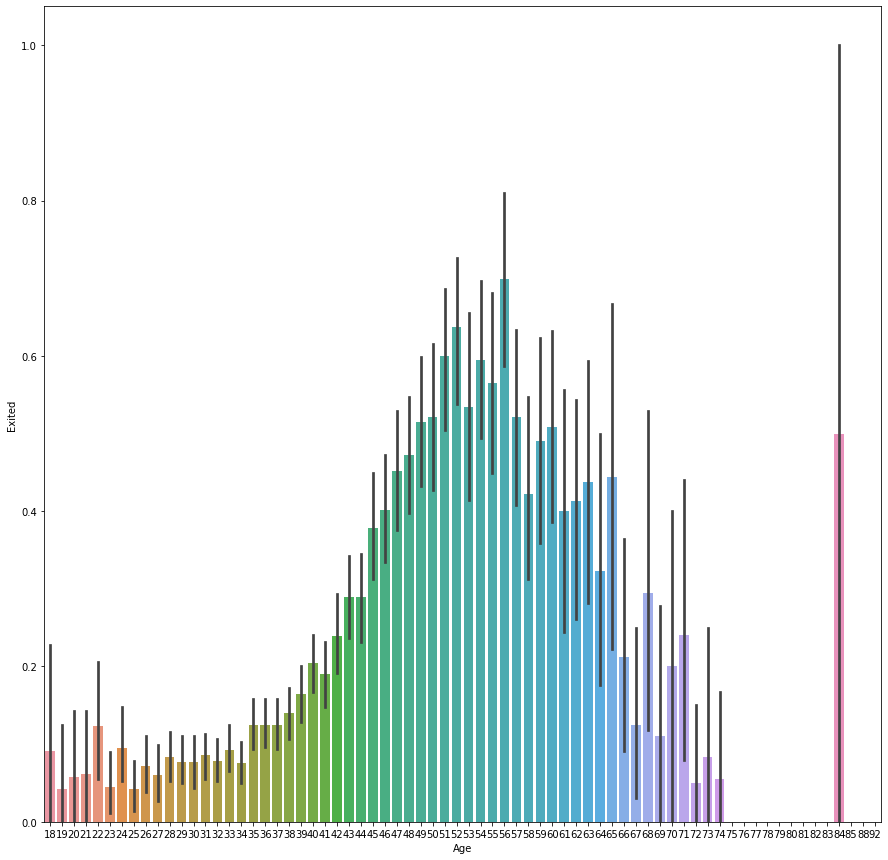

In [38]:
#Distribution of exited customers based on age
plt.figure(figsize=(15,15))
sns.barplot(x='Age', y='Exited', data=customer_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


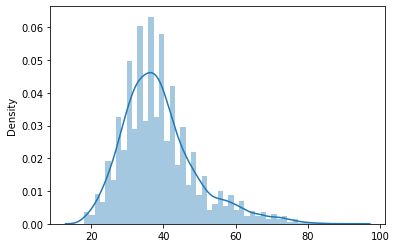

In [39]:
#Age distribution
sns.distplot(x=customer_data['Age'])

### Heatmap to show correlation between dataset features 

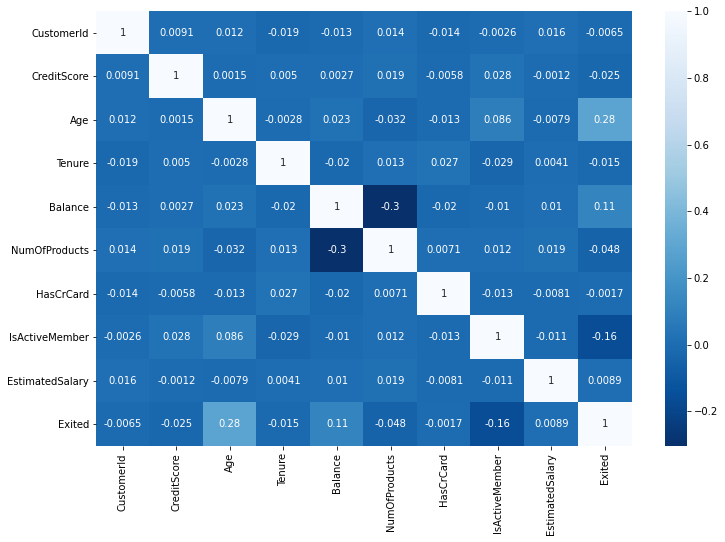

In [40]:
data_corr = customer_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr,cmap='Blues_r',annot=True)
plt.show()

In [41]:
X,y = dp.Xytable(customer_data)
X = dp.categorical_data(X)

### Feature Scaling and train test split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [43]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_1',
       'Geography_2'],
      dtype='object')

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Artificial Neural Network Class with different configuration 

In [45]:
class Ann:
    def Ann2(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(11, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(9, activation='relu'))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=100000, batch_size=64, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_2.h5') #save trained model to run on judge dataset
        

In [46]:
ann_model = Ann()
ann_model.Ann2(X_train,y_train,X_test,y_test)

Streaming output truncated to the last 5000 lines.
Epoch 97511/100000
113/113 - 0s - loss: 0.2992 - accuracy: 0.8869
Epoch 97512/100000
113/113 - 0s - loss: 0.2958 - accuracy: 0.8894
Epoch 97513/100000
113/113 - 0s - loss: 0.3117 - accuracy: 0.8860
Epoch 97514/100000
113/113 - 0s - loss: 0.3047 - accuracy: 0.8865
Epoch 97515/100000
113/113 - 0s - loss: 0.3033 - accuracy: 0.8865
Epoch 97516/100000
113/113 - 0s - loss: 0.3027 - accuracy: 0.8879
Epoch 97517/100000
113/113 - 0s - loss: 0.3012 - accuracy: 0.8878
Epoch 97518/100000
113/113 - 0s - loss: 0.2962 - accuracy: 0.8906
Epoch 97519/100000
113/113 - 0s - loss: 0.2938 - accuracy: 0.8906
Epoch 97520/100000
113/113 - 0s - loss: 0.2926 - accuracy: 0.8906
Epoch 97521/100000
113/113 - 0s - loss: 0.2958 - accuracy: 0.8894
Epoch 97522/100000
113/113 - 0s - loss: 0.2999 - accuracy: 0.8882
Epoch 97523/100000
113/113 - 0s - loss: 0.2980 - accuracy: 0.8874
Epoch 97524/100000
113/113 - 0s - loss: 0.2984 - accuracy: 0.8879
Epoch 97525/100000
113/11